# Read Sage City Forum Data And Output Topics

## Requirements Setup

In [236]:
# ! pip install lxml
# ! pip install nltk
# ! pip install seaborn
# ! pip install textblob
# ! pip install bs4
# ! pip install xlrd
# ! pip install openpyxl 
# ! pip install --upgrade nbformat
# ! pip install gensim
# ! pip install langdetect
# ! pip install ipywidgets
# ! pip install wordcloud
import warnings
warnings.filterwarnings('ignore')

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [237]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# For graphing charts
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import plotly.express as px
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup


import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt 
import pandas as pd



# Dataset to process
myFile = '../data/SageCityForumData.xlsx'
GraphTitle = 'Sage City Forum Sentiment'

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Data Exploration and Cleaning

In [238]:
# Read yelp.csv into a DataFrame.
df_Forum = pd.read_excel(myFile, sheet_name='Forum List')
print(df_Forum.shape)
df_Forum.head(10)

(2943, 10)


,ID,Forum ID,Forum Name,Body,Subject,Post Date,User DisplayName,Is Question,Tags,Likes
0,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
1,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
2,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
3,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
4,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
5,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
6,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
7,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
8,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN
9,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN


# Clean the html

## Option 1

In [239]:
# def cleanhtml(raw_html):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr,'',raw_html)
#     return cleantext
# cleanhtml(df_Forum['Body'][0])

## Option 2: BeautifulSoup

In [240]:
def cleanhtml(raw_html):
    return BeautifulSoup(raw_html, "lxml").text

In [241]:
# Create a neutral, positive, negative column

df_Forum['Forum_Post_Raw'] = df_Forum.apply(lambda row: cleanhtml(row['Body']), axis=1)
df_Forum.head(5)

,ID,Forum ID,Forum Name,Body,Subject,Post Date,User DisplayName,Is Question,Tags,Likes,Forum_Post_Raw
0,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
1,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
2,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
3,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...
4,133741,40,Sage X3 General Discussion,"<p class=""_1qeIAgB0cPwnLhDF9XSiJM"">Company upg...",ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,QuestionAndAnswer,NaN,NaN,Company upgraded to windows 10. Used to run an...


In [242]:
df_distinct = df_Forum[['Forum ID', 'Forum Name', 'Subject', 'Post Date', 'User DisplayName', 'Forum_Post_Raw']].drop_duplicates(inplace=False).copy()
print('Distinct records: ', df_distinct.shape)
print('Original Dataset: ', df_Forum.shape)


Distinct records:  (1086, 6)
Original Dataset:  (2943, 11)


# Sentiment Analysis 
Code to generate sentiment analysis

In [243]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound= []
neg = []
neu = []
pos = []
for entry in df_distinct['Forum_Post_Raw']:
    sent = sia.polarity_scores(entry)
    compound.append(sent['compound'])
    neg.append(sent['neg'])
    neu.append(sent['neu'])
    pos.append(sent['pos'])

In [244]:
df_distinct['compound'] = compound
df_distinct['neg'] = neg
df_distinct['neu'] = neu
df_distinct['pos'] = pos
df_distinct.head()

,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090


In [245]:
def getSentiment(compoundScore):
    retVal = "Neutral"
    if (compoundScore > 0.05):
        retVal = "Positive"
    elif (compoundScore <= - 0.05):
        retVal = "Negative"
    
    return retVal

In [246]:
# Create a neutral, positive, negative column

df_distinct['Sentiment'] = df_distinct.apply(lambda row: getSentiment(row['compound']), axis=1)
df_distinct.head(5)

,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,Positive
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive
63,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive
64,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090,Positive


In [247]:
# Make a day column in numeric format so we can use it for linear regression later
df_distinct['PostDate'] = pd.to_datetime(df_Forum['Post Date'])
df_distinct['DayName'] = df_distinct['PostDate'].dt.day_name()
df_distinct['DayOfMonth'] = df_distinct['PostDate'].dt.day
df_distinct.dtypes


Forum ID                     int64
Forum Name                  object
Subject                     object
Post Date                   object
User DisplayName            object
Forum_Post_Raw              object
compound                   float64
neg                        float64
neu                        float64
pos                        float64
Sentiment                   object
PostDate            datetime64[ns]
DayName                     object
DayOfMonth                   int64
dtype: object

In [248]:
df_distinct.head(3)

,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment,PostDate,DayName,DayOfMonth
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral,2019-10-10 05:58:05.730,Thursday,10
31,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,Positive,2019-10-10 12:44:35.957,Thursday,10
62,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,Positive,2019-10-10 14:56:52.947,Thursday,10


## Train The Sentiment Analyzer

In [249]:
p = re.compile(" 00:00:00")
p.split('01/01/2021 12:12:10')

['01/01/2021 12:12:10']

In [250]:
y = df_distinct['Sentiment']
X = df_distinct[['compound', 'neg', 'neu', 'pos']]

In [251]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score, train_test_split

In [252]:
rf.fit(X,y)

RandomForestClassifier()

In [253]:
cross_val_score(rf, X, y)
# versus the baseline (63%), this is a little weak.

array([1.        , 1.        , 1.        , 0.99539171, 1.        ])

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.30,
                                                        random_state=14)
rf.fit(X_train,y_train)

RandomForestClassifier()

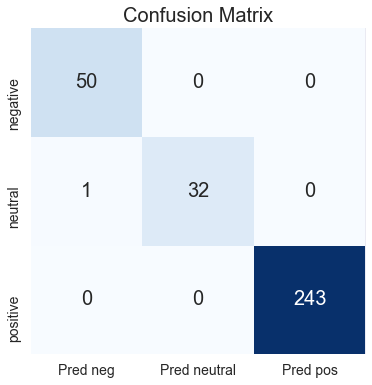

In [255]:

conmat = np.array(confusion_matrix(y_test, rf.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],\
                     columns=['Pred neg', 'Pred neutral', 'Pred pos'])

plt.figure(figsize = (6,6))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)
plt.savefig('ConfusionMatric.png')


In [256]:
# SAVE THIS MANUALLY TO A PICTURE
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99        50
     Neutral       1.00      0.97      0.98        33
    Positive       1.00      1.00      1.00       243

    accuracy                           1.00       326
   macro avg       0.99      0.99      0.99       326
weighted avg       1.00      1.00      1.00       326



In [257]:
df_distinct.isnull().sum()

Forum ID            0
Forum Name          0
Subject             0
Post Date           0
User DisplayName    0
Forum_Post_Raw      0
compound            0
neg                 0
neu                 0
pos                 0
Sentiment           0
PostDate            0
DayName             0
DayOfMonth          0
dtype: int64

In [258]:
# df_distinct

In [259]:
df = df_distinct.copy()
df['ShortText'] = df['Forum_Post_Raw'].str[:50]
df.dtypes
dfLDA = df.copy()

In [260]:
dfLDA = dfLDA.reset_index(drop=True)

In [261]:
dfLDA['Forum_Post_Raw'].isnull().sum()

0

In [262]:
# dfLDA['Forum_Post_Raw'].dropna(inplace=True)

In [263]:
df.set_index('PostDate', inplace=True)

In [264]:
df.head(1)

,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,Sentiment,DayName,DayOfMonth,ShortText
PostDate,,,,,,,,,,,,,,
2019-10-10 05:58:05.730,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,Neutral,Thursday,10,Company upgraded to windows 10. Used to run an...


In [265]:
df2 = df.sort_values(['PostDate']).copy()


In [315]:
fig = px.line(df2, x='Post Date', y='neg')
fig.show()

In [313]:
fig = px.line(df2, x='Post Date', y='pos', color='Sentiment', title='<b>Time Series Sentiment Analysis by Sentiment Category<b>', color_discrete_sequence=['grey', 'blue', 'red'])
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ]) 
    )    
)
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)', 
    'paper_bgcolor': 'rgb(240,240,240)'
})

fig.write_html("Sentiment.html")
fig.show()

In [268]:
# fig = go.figure(
#     go.Table(
#         columnwidth = [50,300,60,40,40],
#         header=dict(
#             values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#             font=dict(size=10),
#             align="left"
#         ),
#         # cells=dict(
#         #     values=[tweets[["created_at","text", "screen_name", "neg", "neu", "pos"]]],
#         #     align = "left")
#         cells=dict(values=[df['Post Date'], df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                 fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
#                 align=['left', 'left', 'left', 'center', 'center', 'center'])        
#     ),
#     row=1, col=1
# )
# fig.update_layout(
#     height=800,
#     showlegend=False,
#     title_text="Twitter Sentiment for " + GraphTitle,
# )




# headerColor = 'grey'
# rowEvenColor = 'lightgrey'
# rowOddColor = 'white'
# alignment = ['left', 'left', 'left', 'center', 'center', 'center']

# fig = go.Figure(data=[go.Table(
#     columnwidth = [30,300,60,40,40],
#     header=dict(values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#                 fill_color=headerColor,
#                 align=alignment),
#     cells=dict(values=[df['PostDate'].dt.strftime("%m/%d/%y %H:%M:%S"), df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                fill_color = [[rowOddColor,rowEvenColor]*df.shape[0]],
#                align=alignment))
# ])

# fig.show()

In [269]:
# headerColor = 'grey'
# rowEvenColor = 'lightgrey'
# rowOddColor = 'white'

# # for i, row in enumerate(df_Forum["Post Date"]):
# #     p = re.compile(" 00:00:00")
# #     datetime = p.split(df["Post Date"][i])[0]
# #     df.iloc[i, 1] = datetime

# fig = make_subplots(
#     rows=3, cols=1,
#     shared_xaxes=True,
#     vertical_spacing=0.03,
#     specs=[[{"type": "table"}],
#            [{"type": "scatter"}],
#            [{"type": "scatter"}]]
# )

# fig.add_trace(
#     go.Scatter(
#         x=df["Post Date"],
#         y=df["pos"],
#         mode="lines",
#         name="Positive Sentiment"
#     ),
#     row=3, col=1
# )

# fig.add_trace(
#     go.Scatter(
#         x=df["Post Date"],
#         y=df["neg"],
#         mode="lines",
#         name="Negative Sentiment"
#     ),
#     row=2, col=1
# )

# fig.add_trace(
#     go.Table(
#         columnwidth = [50,300,60,40,40],
#         header=dict(
#             values=["Timestamp", "Forum_Post_Raw", "User DisplayName", "Negative", "Neutral", "Positive"],
#             font=dict(size=10),
#             align="left"
#         ),
#         # cells=dict(
#         #     values=[tweets[["created_at","text", "screen_name", "neg", "neu", "pos"]]],
#         #     align = "left")
#         cells=dict(values=[df['Post Date'], df.Forum_Post_Raw, df['User DisplayName'], df.neg, df.neu, df.pos],
#                 fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
#                 align=['left', 'left', 'left', 'center', 'center', 'center'])        
#     ),
#     row=1, col=1
# )
# fig.update_layout(
#     height=800,
#     showlegend=False,
#     title_text="Twitter Sentiment for " + GraphTitle,
# )

# fig.write_html('Sentiment.html')
# fig.show()

In [270]:
features = ['Forum_Post_Raw','neg','neu','pos']

# Top 5 Neutral Posts
dfNeu = df[features].sort_values("neu", ascending=False).head(5)
dfNeu.name = "Neutral"


# Top 5 Negative Posts
dfNeg = df[features].sort_values("neg", ascending=False).head(5)
dfNeg.name = "Negative"

# Top 5 Positive Posts
dfPos = df[features].sort_values("pos", ascending=False).head(5)
dfPos.name = "Positive"
dataSets = [dfNeu,dfPos, dfNeg]


In [271]:
df.describe()

,Forum ID,compound,neg,neu,pos,DayOfMonth
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,91.429098,0.358396,0.039499,0.853801,0.105767,15.840700
std,155.599403,0.520617,0.053476,0.091070,0.076172,8.454238
min,40.000000,-0.997200,0.000000,0.000000,0.000000,1.000000
25%,40.000000,0.000000,0.000000,0.802000,0.050000,9.000000
50%,40.000000,0.495150,0.018000,0.862500,0.098000,16.000000
75%,40.000000,0.805275,0.064000,0.916000,0.152000,23.000000
max,673.000000,0.989500,0.415000,1.000000,0.394000,31.000000


In [272]:
# Alternative way to make tables, doesn't work as well!
# import plotly.figure_factory as ff

# def WriteTable(dataSets):
#     for frame in dataSets:
#         fig =  ff.create_table(frame)
#         fig.write_html(frame.name+".html")
#         fig.show()

# WriteTable(dataSets)

In [276]:

import plotly.graph_objects as go
import pandas as pd

def WriteMyTable(dataSets):
    for frame in dataSets:
        headerColor = 'grey'
        rowEvenColor = 'lightgrey'
        rowOddColor = 'white'

        fig = go.Figure(data=[go.Table(
            columnwidth = [300,40,40,40],
            header=dict(values=[x for x in ['Forum Post', 'Neg', 'Neu', 'Pos']],
                        fill_color='#39416C',                
                        font=dict(color='white', size=12),
                        align=['left', 'center', 'center', 'center']),
            cells=dict(values=[frame.Forum_Post_Raw, frame.neg, frame.neu, frame.pos],
                    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
                    align=['left', 'center', 'center', 'center']))
        ])
        fig.update_layout(title=frame.name, width=1000, height=500, 
                           margin=go.layout.Margin(
                               l=0, #left margin
                               r=0, #right margin
                               b=0, #bottom margin
                               t=0  #top margin
    ))
        fig.write_html(frame.name+".html")
        fig.show()

WriteMyTable(dataSets)


# Charting Ideas
1. Top pos / neg post by user
2. Trend line over time (SNS) color = user
- Does it match up to release dates or seasonal timings? 
- Was there a bad release?
- Was there a good release?
- Can we classify based on tags?

3. PCA analysis
4. Felix analysis (lda): https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc
5. Prediction of nltk accuracy chart?

# Latent Dirichlet Allocation (LDA) Analysis

Three main parameters of the model
1. Number of topics
2. Number of words per topic
3. Number of topics per document

In [39]:
from gensim import corpora, models
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from gensim.models import Phrases
from gensim import corpora
from gensim import models
import numpy as np


import nltk
nltk.download('averaged_perceptron_tagger')
from itertools import chain # to flatten list of sentences of tokens into list of tokens



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-39-6223f08b0e3e>:4: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



0it [00:00, ?it/s]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BDelamater\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [40]:
dfLDA.isna().sum()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Forum ID            0
Forum Name          0
Subject             0
Post Date           0
User DisplayName    0
Forum_Post_Raw      0
compound            0
neg                 0
neu                 0
pos                 0
Sentiment           0
PostDate            0
DayName             0
DayOfMonth          0
ShortText           0
dtype: int64

In [41]:
dfLDA['sentences'] = dfLDA.Forum_Post_Raw.progress_map(sent_tokenize)
dfLDA['sentences'].head(1).tolist()[0][:3]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

['Company upgraded to windows 10.',
 'Used to run an ERP program which no one heard about, made by U8Soft (keep in mind that the company is in China).',
 'They are now asking for an insanely high amount of money to get it to work on windows 10.']

In [42]:
dfLDA['token_sentences'] = dfLDA['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(dfLDA['token_sentences'].head(1).tolist()[0][:3])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

[['Company', 'upgraded', 'to', 'windows', '10', '.'], ['Used', 'to', 'run', 'an', 'ERP', 'program', 'which', 'no', 'one', 'heard', 'about', ',', 'made', 'by', 'U8Soft', '(', 'keep', 'in', 'mind', 'that', 'the', 'company', 'is', 'in', 'China', ')', '.'], ['They', 'are', 'now', 'asking', 'for', 'an', 'insanely', 'high', 'amount', 'of', 'money', 'to', 'get', 'it', 'to', 'work', 'on', 'windows', '10', '.']]


In [43]:
dfLDA['tokens_sentences'] = dfLDA['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(dfLDA['tokens_sentences'].head(1).tolist()[0][:3])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

[['Company', 'upgraded', 'to', 'windows', '10', '.'], ['Used', 'to', 'run', 'an', 'ERP', 'program', 'which', 'no', 'one', 'heard', 'about', ',', 'made', 'by', 'U8Soft', '(', 'keep', 'in', 'mind', 'that', 'the', 'company', 'is', 'in', 'China', ')', '.'], ['They', 'are', 'now', 'asking', 'for', 'an', 'insanely', 'high', 'amount', 'of', 'money', 'to', 'get', 'it', 'to', 'work', 'on', 'windows', '10', '.']]


## Lemmatize with POS tagging

In [44]:
dfLDA['POS_tokens'] = dfLDA['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(dfLDA['POS_tokens'].head(1).tolist()[0][:3])


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

[[('Company', 'NN'), ('upgraded', 'VBD'), ('to', 'TO'), ('windows', 'VB'), ('10', 'CD'), ('.', '.')], [('Used', 'VBN'), ('to', 'TO'), ('run', 'VB'), ('an', 'DT'), ('ERP', 'NNP'), ('program', 'NN'), ('which', 'WDT'), ('no', 'DT'), ('one', 'NN'), ('heard', 'NN'), ('about', 'IN'), (',', ','), ('made', 'VBN'), ('by', 'IN'), ('U8Soft', 'NNP'), ('(', '('), ('keep', 'VB'), ('in', 'IN'), ('mind', 'NN'), ('that', 'IN'), ('the', 'DT'), ('company', 'NN'), ('is', 'VBZ'), ('in', 'IN'), ('China', 'NNP'), (')', ')'), ('.', '.')], [('They', 'PRP'), ('are', 'VBP'), ('now', 'RB'), ('asking', 'VBG'), ('for', 'IN'), ('an', 'DT'), ('insanely', 'RB'), ('high', 'JJ'), ('amount', 'NN'), ('of', 'IN'), ('money', 'NN'), ('to', 'TO'), ('get', 'VB'), ('it', 'PRP'), ('to', 'TO'), ('work', 'VB'), ('on', 'IN'), ('windows', 'NNS'), ('10', 'CD'), ('.', '.')]]


In [45]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [46]:
# Lemmatizing each word with its POS tag, in each sentence
dfLDA['tokens_sentences_lemmatized'] = dfLDA['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/1086 [00:00<?, ?it/s]

In [47]:
dfLDA['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['Company', 'upgrade', 'to', 'windows', '10', '.'],
 ['Used',
  'to',
  'run',
  'an',
  'ERP',
  'program',
  'which',
  'no',
  'one',
  'heard',
  'about',
  ',',
  'make',
  'by',
  'U8Soft',
  '(',
  'keep',
  'in',
  'mind',
  'that',
  'the',
  'company',
  'be',
  'in',
  'China',
  ')',
  '.'],
 ['They',
  'be',
  'now',
  'ask',
  'for',
  'an',
  'insanely',
  'high',
  'amount',
  'of',
  'money',
  'to',
  'get',
  'it',
  'to',
  'work',
  'on',
  'window',
  '10',
  '.']]

## Regrouping tokens and removing stop words

In [48]:
distinctUserNames = df['User DisplayName'].drop_duplicates(inplace=False).copy()
print(distinctUserNames.shape)
print(df['User DisplayName'].shape)
distinctUserNames.to_list()

(405,)
(1086,)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['ChinusGomes',
 'AnikB',
 'Alecia',
 'pnightingale',
 'ChrisCC',
 'Juan Pablo G',
 'JeffW-SageX3',
 'JohannRSA',
 'garry@kbm.net.au',
 'Breedlove',
 'FormerMember',
 'Denise Hartman',
 'obert',
 'amine azi',
 'PeterLing',
 'trbaron',
 'Jonny333',
 'jsward9',
 'ovi123',
 'DewaldH',
 'Widi',
 'abhiacap',
 'pranay',
 'Alec6',
 'iosman123',
 'Vineeth',
 'martin2',
 'Gavin J',
 'Girts Mazais',
 'MikeDavies',
 'MARCOW',
 'Mikael',
 'Martin.Bean.Tangerine.Software',
 'Saq-1',
 'TJunction',
 'Shereef',
 'mavara',
 'AksarBhai',
 'AH3',
 'Shivam Rajput',
 'Christine T.',
 'Donavon',
 'binumathewp75@gmail.com',
 'Angela30',
 'Gavin Maxwell',
 'Craig Wilson',
 'SalomeVan',
 'Martins de Almeida',
 'saber',
 'Jacky77',
 'Laura W.',
 'NewAdm2019',
 'PatrickR',
 'Vince27',
 'MFSilva',
 'Militaru',
 'pharrell@ganong.com',
 'JMcCourt',
 'NateP',
 'amine05',
 'ALU',
 'meweini',
 'TopX3',
 'Sammylie',
 'Greytrix',
 'Damian J Bourke',
 'katiec',
 'barkerbob',
 'Franco.Martinez',
 'Jennifer Briseno',
 'Mar

In [49]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
stopwords_nonsense = ['hello', 'thanks', 'thank', 'le', 'la', 'hi', 'try', 'sage', 'however', 'way', 'data', 'download', 'anyone', 'university', 'matteos', 'regard', 'best', 'table', 'field', 'support', 'sur', 'une', 'thx', 'shall', 'others', 'please', 'someone']
stopwords_names = distinctUserNames.to_list()
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other + stopwords_nonsense + stopwords_names


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [50]:
dfLDA['tokens'] = dfLDA['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
dfLDA['tokens'] = dfLDA['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
dfLDA.shape

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1086, 21)

In [52]:
dfLDA['tokens'].head(1).tolist()[0][:30]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['company',
 'upgrade',
 'windows',
 'used',
 'run',
 'erp',
 'program',
 'heard',
 'keep',
 'mind',
 'company',
 'china',
 'ask',
 'insanely',
 'high',
 'amount',
 'money',
 'work',
 'window',
 'instal',
 'window',
 'ca',
 'select',
 'server',
 'drop',
 'menu',
 'almost',
 'network',
 'list',
 'except']

## Data Preparation

In [53]:
tokens = dfLDA['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [54]:
dfLDA.shape

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1086, 21)

In [55]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [56]:
np.random.seed(123456)
num_topics = 32
numPasses = 10
numWords = 30
alpha=[0.01]
eta=[0.01]
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=numPasses, alpha=alpha*num_topics, eta=eta*len(dictionary_LDA.keys()))



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Wall time: 5.94 s


In [57]:
lda_model.save('myLdaModel.model')

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=numWords):
    print(str(i)+": "+ topic)
    print()

0: 0.022*"error" + 0.012*"file" + 0.011*"result" + 0.011*"set" + 0.011*"customer" + 0.011*"application" + 0.009*"look" + 0.009*"require" + 0.008*"setup" + 0.008*"change" + 0.008*"process" + 0.008*"delivery" + 0.007*"create" + 0.007*"code" + 0.007*"work" + 0.006*"volume" + 0.006*"product" + 0.006*"formula" + 0.006*"order" + 0.006*"still" + 0.006*"help" + 0.006*"account" + 0.005*"enable" + 0.005*"return" + 0.005*"procedure" + 0.005*"different" + 0.005*"transaction" + 0.005*"much" + 0.005*"system" + 0.005*"quantity"

1: 0.023*"user" + 0.023*"https_enter_log_credential" + 0.023*"access_log_http_search" + 0.023*"upper_right_corner_type" + 0.023*"type_click_search_complete" + 0.023*"search_click_search_important" + 0.023*"update_portal_access_portal" + 0.023*"recommended_work_certified_partner" + 0.023*"ensure_component_compatible_highly" + 0.023*"list_available_downloads_patch" + 0.023*"product_check_business_partner" + 0.023*"vendor_product_ensure_product" + 0.023*"product_integrate_isvs_c

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
topics_tuple = lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=numWords)
# topics[0][:3]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [60]:
# indexed_topic_tuple = topics[0][1][:3]
# indexed_topic_tuple

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [61]:
# specific_index_topic_tuple = indexed_topic_tuple[1]
# specific_index_topic_tuple

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
# specific_index_topic_tuple_percentage = specific_index_topic_tuple[1]
# specific_index_topic_tuple_percentage

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [63]:
topic_index_with_sum = []
topics = lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=numWords)
sum = 0
scoreOutput = []
for topicNumber, wordArrayScore in lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=numWords):
    sum = 0
    for scoreList in wordArrayScore:
#         print(scoreList[1])
        sum += scoreList[1]
    scoreOutput.append([topicNumber,sum])
    
print(scoreOutput)    


[[0, 0.23047548858448863], [1, 0.4954696004278958], [2, 0.2827910054475069], [3, 0.28596436185762286], [4, 0.25645609525963664], [5, 0.24877333035692573], [6, 0.26232508290559053], [7, 0.30046466272324324], [8, 0.31589805986732244], [9, 0.2998074544593692], [10, 0.3881560489535332], [11, 0.2825203202664852], [12, 0.2672796519473195], [13, 0.3204682311043143], [14, 0.28059110091999173], [15, 0.2750297491438687], [16, 0.31277057342231274], [17, 0.31279363483190536], [18, 0.37365668965503573], [19, 0.2942597079090774], [20, 0.28491235710680485], [21, 0.28188196662813425], [22, 0.28234350169077516], [23, 0.2791500953026116], [24, 0.37703014770522714], [25, 0.2509843581356108], [26, 0.3083070069551468], [27, 0.2871261262334883], [28, 0.2843434698879719], [29, 0.29143518256023526], [30, 0.3210146827623248], [31, 0.2966806613840163]]


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [64]:
topics

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  [('error', 0.021667508),
   ('file', 0.011808726),
   ('result', 0.011316609),
   ('set', 0.011146893),
   ('customer', 0.011102092),
   ('application', 0.010710052),
   ('look', 0.00883387),
   ('require', 0.008522207),
   ('setup', 0.008360519),
   ('change', 0.007973238),
   ('process', 0.007792247),
   ('delivery', 0.007659038),
   ('create', 0.0074029053),
   ('code', 0.0071725883),
   ('work', 0.0067287628),
   ('volume', 0.0064095655),
   ('product', 0.006181278),
   ('formula', 0.0061368477),
   ('order', 0.0061361967),
   ('still', 0.0057479856),
   ('help', 0.0056006075),
   ('account', 0.0056003244),
   ('enable', 0.005495492),
   ('return', 0.005420508),
   ('procedure', 0.0054057776),
   ('different', 0.005074152),
   ('transaction', 0.004935565),
   ('much', 0.0048308084),
   ('system', 0.0046515795),
   ('quantity', 0.0046515455)]),
 (1,
  [('user', 0.023481084),
   ('https_enter_log_credential', 0.022573637),
   ('access_log_http_search', 0.022573326),
   ('upper

In [65]:
# for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=numWords):
#     print(str(i)+": "+ topic)
#     print()

model_topic_words =[]
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=numWords):
    t_words =[]
    ts =topic.split("+")
    for t in range(0, len(ts)):
        # print(ts[t].split('*'))
        t_words.append(ts[t].split('*')[1])

    model_topic_words.append(t_words)

# model_topic_words[:2]



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [66]:
## Allocation topics to documents
dfLDA.head(1)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,...,PostDate,DayName,DayOfMonth,ShortText,sentences,token_sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,...,2019-10-10 05:58:05.730,Thursday,10,Company upgraded to windows 10. Used to run an...,"[Company upgraded to windows 10., Used to run ...","[[Company, upgraded, to, windows, 10, .], [Use...","[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr..."


In [67]:
dfLDA.shape

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1086, 21)

In [68]:
lda_model[corpus[0]]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(12, 0.9914639)]

# Make Word Graphic Chart

In [69]:
topics=lda_model.show_topics(num_topics=num_topics, num_words=numWords, formatted=False)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [70]:
topics[3]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(3,
 [('folder', 0.021684492),
  ('date', 0.01901972),
  ('enter', 0.015182529),
  ('class', 0.012584233),
  ('item', 0.01210417),
  ('select', 0.012089327),
  ('invoice', 0.011800784),
  ('error', 0.011124419),
  ('report', 0.010643501),
  ('month', 0.010459468),
  ('record', 0.008873747),
  ('line', 0.008861774),
  ('advance', 0.008847939),
  ('help', 0.008806914),
  ('update', 0.008526142),
  ('custom', 0.008287403),
  ('create', 0.008064835),
  ('run', 0.00732059),
  ('save', 0.0071179834),
  ('import', 0.007097956),
  ('show', 0.0070947455),
  ('function', 0.007090565),
  ('list', 0.007089534),
  ('build', 0.007002599),
  ('week', 0.006961319),
  ('must', 0.0068924325),
  ('work', 0.0066208327),
  ('achieve', 0.0065126247),
  ('view', 0.006370225),
  ('screen', 0.005831561)])

In [71]:
for x in topics:
    print(x)

(0, [('error', 0.021667508), ('file', 0.011808726), ('result', 0.011316609), ('set', 0.011146893), ('customer', 0.011102092), ('application', 0.010710052), ('look', 0.00883387), ('require', 0.008522207), ('setup', 0.008360519), ('change', 0.007973238), ('process', 0.007792247), ('delivery', 0.007659038), ('create', 0.0074029053), ('code', 0.0071725883), ('work', 0.0067287628), ('volume', 0.0064095655), ('product', 0.006181278), ('formula', 0.0061368477), ('order', 0.0061361967), ('still', 0.0057479856), ('help', 0.0056006075), ('account', 0.0056003244), ('enable', 0.005495492), ('return', 0.005420508), ('procedure', 0.0054057776), ('different', 0.005074152), ('transaction', 0.004935565), ('much', 0.0048308084), ('system', 0.0046515795), ('quantity', 0.0046515455)])
(1, [('user', 0.023481084), ('https_enter_log_credential', 0.022573637), ('access_log_http_search', 0.022573326), ('upper_right_corner_type', 0.022573313), ('type_click_search_complete', 0.022573285), ('search_click_search_i

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



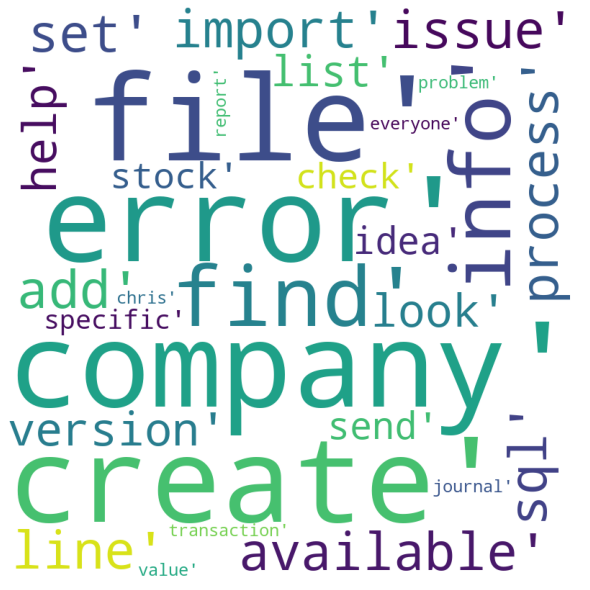

In [72]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(my_stopwords)


for val in topics[i]:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', 
                     stopwords = stopwords, 
                     min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('WordGraphBob.png')

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



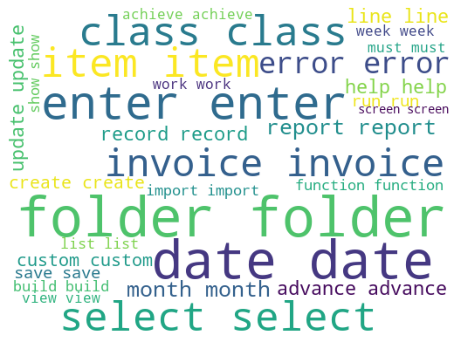

In [73]:
topics=lda_model.show_topics(num_topics=num_topics, num_words=numWords, formatted=False)
i=3 #/  using 2 for capstone, but don't want to overwrite
wc = pd.DataFrame(topics[i][1], columns=['word','pct'])
wc['pct']=wc['pct']*1000
wc['pct']=wc['pct'].astype(int)
words = []
wc['wm']=wc['word'].apply(lambda w: w +' ')*wc['pct']
topic_words =' '.join(wc['wm'].to_list())
plt.subplots(figsize = (8,8))
wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(topic_words)
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('wc_topic'+str(i+1)+'.png')

## Predict based on input

# Advanced exploration of LDA result
## Allocation of topics in all documents

In [74]:
topics = [lda_model[corpus[i]] for i in range(len(dfLDA))]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [75]:

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038537,NaN,NaN,NaN,NaN,NaN,0.091301,NaN,NaN,0.869287,NaN


In [77]:

# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
# Which document are about topic 14
# document_topic.sort_values(num_topics-1, ascending=False)[num_topics-1].head(10)
document_topic

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
1,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
2,0.00000,0.983079,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
3,0.00000,0.983079,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
4,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
1082,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.115502
1083,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
1084,0.03125,0.031250,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,...,0.031250,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.031250


# Topic Diagnostic Investigation

In [79]:
# type(document_topic)
# document_topic[[18]].sort_values(by=18, ascending=False).head().mean()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [80]:
topic_mean = []
for i in document_topic.columns:
    topic_mean.append((document_topic[[i]].sort_values(by=i, ascending=False).mean()))
    
pd.DataFrame(topic_mean)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.025425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.039359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.029518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.028431,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.032783,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.035478,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.034221,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03595,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018925,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# # Get top 5 rows in the dataset for a given topic
# topicNumberToSearch = 11
# dfTopic = document_topic[[topicNumberToSearch]].sort_values(by=topicNumberToSearch, ascending=False).head().copy()
# for i in dfTopic.T:
#     print('Row: ', i, '\r\n', dfLDA.loc[i]['Forum_Post_Raw'],"\r\n"*2, '-'*100, "\r\n"*2)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [82]:
dfLDA
dfLDA[dfLDA['Forum_Post_Raw'].str.contains("idea")].index[:2]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Int64Index([0, 20], dtype='int64')

In [83]:
ideaTopics = dfLDA[dfLDA['Forum_Post_Raw'].str.contains("idea")]
ideaTopics
# for i in ideaTopics.T:
#     print(document_topic.loc[i])
pd.DataFrame(document_topic.iloc[20])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,20
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.972613
7,0.000000
8,0.000000
9,0.000000


In [84]:
# document_topic.where(document_topic[18]>0).sort_values(by=18, ascending=False).head(5)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [85]:
document_topic.loc[1082]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.251600
17    0.000000
18    0.000000
19    0.000000
20    0.601779
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.115502
Name: 1082, dtype: float64

In [86]:
dfLDA.head(5)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,...,PostDate,DayName,DayOfMonth,ShortText,sentences,token_sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,...,2019-10-10 05:58:05.730,Thursday,10,Company upgraded to windows 10. Used to run an...,"[Company upgraded to windows 10., Used to run ...","[[Company, upgraded, to, windows, 10, .], [Use...","[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr..."
1,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,...,2019-10-10 12:44:35.957,Thursday,10,Hello!\n\nI see that Sage V11 patch 14 was com...,"[Hello!, I see that Sage V11 patch 14 was comp...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[(Hello, NN), (!, .)], [(I, PRP), (see, VBP),...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[patch, complete, october, least, patch, finde..."
2,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 14:56:52.947,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, type, click, searc..."
3,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 20:56:53.483,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, type, click, searc..."
4,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090,...,2019-10-11 13:10:28.983,Friday,11,I am trying to remove some of the columns on t...,[I am trying to remove some of the columns on ...,"[[I, am, trying, to, remove, some, of, the, co...","[[I, am, trying, to, remove, some, of, the, co...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, remove, some, of, the, colum...","[remove, column, object, stock, selection, bro..."


In [87]:
# print(dfLDA.Forum_Post_Raw.loc[31][:100])

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



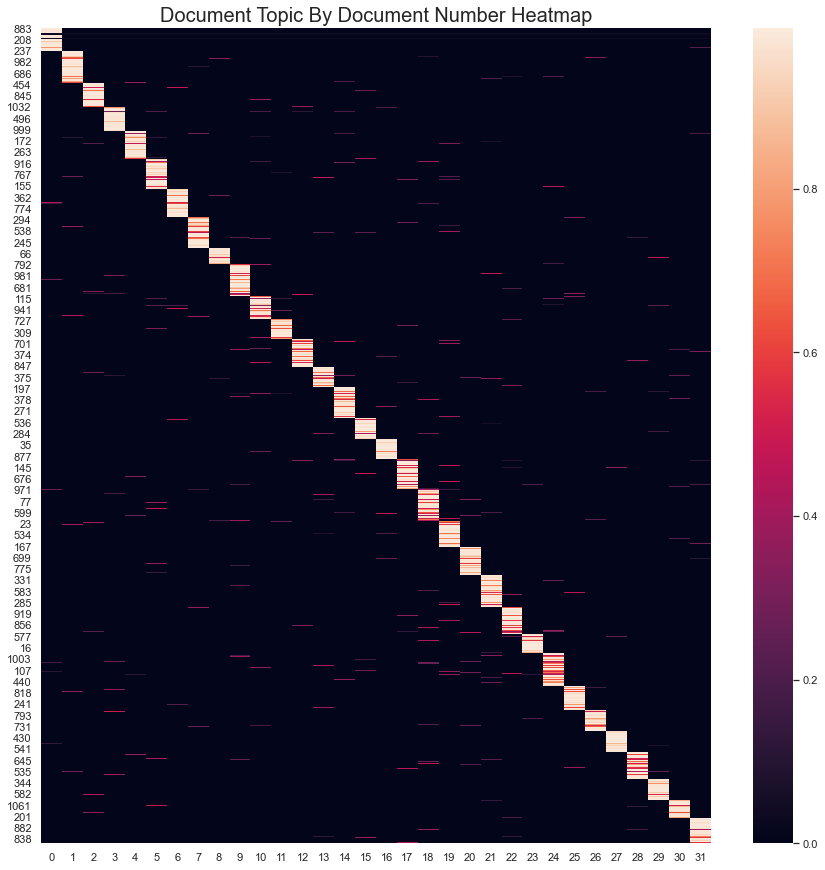

In [88]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])
plt.title('Document Topic By Document Number Heatmap', fontsize=20)
plt.savefig('heatmap.png', bbox_inches='tight')

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



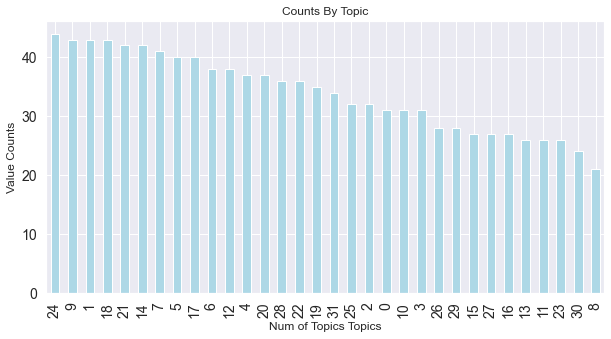

In [89]:
sns.set(rc={'figure.figsize':(10,5)})
ax = document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue', title='Counts By Topic', fontsize=14)
ax.set_xlabel("Num of Topics Topics")
ax.set_ylabel("Value Counts")
ax.figure.savefig('TopicValueCounts.png')

# Visualize the data

In [90]:
# ! pip install pyLDAvis

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
# import scipy
# scipy.test()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [92]:
dfLDA.shape

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1086, 21)

In [93]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a    parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)


%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA, sort_topics=False)
pyLDAvis.enable_notebook()
pyLDAvis.save_html(vis, 'myBook.html')
pyLDAvis.display(vis)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [94]:
# # Get topic weights and dominant topics ------------
# from sklearn.manifold import TSNE
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import Label
# from bokeh.io import output_notebook

# # Get topic weights
# topic_weights = []
# for i, row_list in enumerate(lda_model[corpus]):
#     topic_weights.append([w for i, w in row_list[0]])

# # Array of topic weights    
# arr = pd.DataFrame(topic_weights).fillna(0).values

# # Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# # Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

# # tSNE Dimension Reduction
# tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
# tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 4
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# show(plot)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [95]:
dfLDA.head()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,...,PostDate,DayName,DayOfMonth,ShortText,sentences,token_sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,...,2019-10-10 05:58:05.730,Thursday,10,Company upgraded to windows 10. Used to run an...,"[Company upgraded to windows 10., Used to run ...","[[Company, upgraded, to, windows, 10, .], [Use...","[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr..."
1,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,...,2019-10-10 12:44:35.957,Thursday,10,Hello!\n\nI see that Sage V11 patch 14 was com...,"[Hello!, I see that Sage V11 patch 14 was comp...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[(Hello, NN), (!, .)], [(I, PRP), (see, VBP),...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[patch, complete, october, least, patch, finde..."
2,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 14:56:52.947,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, type, click, searc..."
3,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 20:56:53.483,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, type, click, searc..."
4,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090,...,2019-10-11 13:10:28.983,Friday,11,I am trying to remove some of the columns on t...,[I am trying to remove some of the columns on ...,"[[I, am, trying, to, remove, some, of, the, co...","[[I, am, trying, to, remove, some, of, the, co...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, remove, some, of, the, colum...","[remove, column, object, stock, selection, bro..."


In [96]:
print(dfLDA.shape)
print(len(document_topic))

(1086, 21)
1086


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [97]:
dfBob = dfLDA.copy()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
dfBob = dfBob.reset_index(drop=True)
dfBob

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,...,PostDate,DayName,DayOfMonth,ShortText,sentences,token_sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,40,Sage X3 General Discussion,ERP help urgently needed,2019-10-10T05:58:05.73,ChinusGomes,Company upgraded to windows 10. Used to run an...,0.0387,0.063,0.873,0.064,...,2019-10-10 05:58:05.730,Thursday,10,Company upgraded to windows 10. Used to run an...,"[Company upgraded to windows 10., Used to run ...","[[Company, upgraded, to, windows, 10, .], [Use...","[[Company, upgraded, to, windows, 10, .], [Use...","[[(Company, NN), (upgraded, VBD), (to, TO), (w...","[[Company, upgrade, to, windows, 10, .], [Used...","[company, upgrade, windows, used, run, erp, pr..."
1,40,Sage X3 General Discussion,Sage V11 patch 14 - release soon?,2019-10-10T12:44:35.957,AnikB,Hello!\n\nI see that Sage V11 patch 14 was com...,0.7044,0.022,0.915,0.063,...,2019-10-10 12:44:35.957,Thursday,10,Hello!\n\nI see that Sage V11 patch 14 was com...,"[Hello!, I see that Sage V11 patch 14 was comp...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[[(Hello, NN), (!, .)], [(I, PRP), (see, VBP),...","[[Hello, !], [I, see, that, Sage, V11, patch, ...","[patch, complete, october, least, patch, finde..."
2,673,"Sage X3 Announcements, News, and Alerts",Sage X3 12.0.19 and Patch 19 Add-ons Updates h...,2019-10-10T14:56:52.947,Alecia,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 14:56:52.947,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, type, click, searc..."
3,673,"Sage X3 Announcements, News, and Alerts",Sage X3 Warehousing (GEODE) v12.0.19 has been ...,2019-10-10T20:56:53.483,pnightingale,"To access this download, log into https://supp...",0.9359,0.000,0.898,0.102,...,2019-10-10 20:56:53.483,Thursday,10,"To access this download, log into https://supp...","[To access this download, log into https://sup...","[[To, access, this, download, ,, log, into, ht...","[[To, access, this, download, ,, log, into, ht...","[[(To, TO), (access, NN), (this, DT), (downloa...","[[To, access, this, download, ,, log, into, ht...","[access, log, http, search, type, click, searc..."
4,40,Sage X3 General Discussion,Modifying Stock Change ST2 object,2019-10-11T13:10:28.983,ChrisCC,I am trying to remove some of the columns on t...,0.5980,0.046,0.865,0.090,...,2019-10-11 13:10:28.983,Friday,11,I am trying to remove some of the columns on t...,[I am trying to remove some of the columns on ...,"[[I, am, trying, to, remove, some, of, the, co...","[[I, am, trying, to, remove, some, of, the, co...","[[(I, PRP), (am, VBP), (trying, VBG), (to, TO)...","[[I, be, try, to, remove, some, of, the, colum...","[remove, column, object, stock, selection, bro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,332,Sage Data &amp; Analytics,dimension type setting,2020-04-29T11:08:12.53,Afrosage,\nThe above pic is carry forward selection ch...,0.5770,0.035,0.861,0.103,...,2020-04-29 11:08:12.530,Wednesday,29,\nThe above pic is carry forward selection ch...,[\nThe above pic is carry forward selection c...,"[[The, above, pic, is, carry, forward, selecti...","[[The, above, pic, is, carry, forward, selecti...","[[(The, DT), (above, JJ), (pic, NN), (is, VBZ)...","[[The, above, pic, be, carry, forward, selecti...","[pic, carry, forward, selection, check, unchec..."
1082,332,Sage Data &amp; Analytics,PORDERQ - RETRCPDAT field ?,2020-04-23T11:51:48.66,Nicolasson,"Hello guys, \n\nI hope you are well. \n\nI mad...",0.9136,0.000,0.700,0.300,...,2020-04-2

In [99]:
document_topic

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
1,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
2,0.00000,0.983079,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
3,0.00000,0.983079,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
4,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
1082,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.115502
1083,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
1084,0.03125,0.031250,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,...,0.031250,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.031250


In [100]:
document_topic.loc[164]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.413641
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.580150
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
Name: 164, dtype: float64

In [101]:
# document_topic[['18']]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [102]:
dfBob.loc[1081]['Forum_Post_Raw']

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'\nThe above pic is\xa0 carry forward selection check or unchecked option from SageU.\nMy setting dpt dimension type is cost center that holds all expenses value.\nThe question is, if carry forward not checked, what happen to the value the dimension in year -end process. What I know, all expenses (as nominal) value usually become zero in year-end process. so shall I select no carry forward?'

In [103]:
dfLDA = dfBob.copy()
print(dfLDA.shape)

(1086, 21)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [104]:
for i in range(0,3):
    dfLDA['topic'+ str(i)]=None
    dfLDA['topic'+str(i)+'_pct']=None

for r in range(0,len(document_topic)):
    ts = document_topic.loc[r].sort_values(ascending=False)[:3]
#     print(ts)
    topic_nums = list(ts.index)
    print(topic_nums)
    topic_pcts = list(ts)
#     print(topic_pcts)
    for i in range(0,3):
        dfLDA.at[r,'topic'+ str(i+1)]=topic_nums[i]+1
        dfLDA.at[r,'topic'+ str(i+1)+'_pct']=topic_pcts[i]+1

# dfLDA.head(5)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[12, 0, 17]
[12, 0, 17]
[1, 0, 30]
[1, 0, 30]
[10, 0, 17]
[0, 1, 30]
[28, 0, 1]
[8, 0, 17]
[24, 14, 27]
[5, 0, 17]
[24, 0, 1]
[20, 0, 1]
[14, 16, 17]
[17, 12, 14]
[17, 0, 1]
[6, 0, 17]
[23, 0, 1]
[1, 0, 30]
[18, 19, 0]
[12, 0, 17]
[6, 0, 17]
[15, 0, 17]
[7, 18, 0]
[19, 0, 1]
[24, 20, 0]
[13, 2, 0]
[7, 0, 17]
[19, 0, 1]
[12, 0, 17]
[17, 19, 0]
[1, 0, 30]
[31, 1, 30]
[13, 0, 17]
[25, 0, 1]
[11, 0, 17]
[16, 1, 30]
[12, 0, 17]
[3, 0, 27]
[16, 1, 30]
[28, 0, 1]
[8, 24, 0]
[13, 0, 17]
[12, 31, 17]
[21, 0, 1]
[24, 0, 1]
[23, 0, 1]
[8, 0, 17]
[15, 6, 0]
[1, 0, 30]
[0, 1, 30]
[18, 9, 8]
[28, 0, 1]
[12, 0, 17]
[18, 0, 1]
[10, 0, 17]
[27, 0, 1]
[24, 21, 0]
[10, 0, 17]
[22, 10, 18]
[23, 0, 1]
[16, 10, 17]
[2, 0, 17]
[18, 16, 1]
[0, 1, 30]
[9, 0, 17]
[20, 0, 1]
[8, 0, 17]
[26, 0, 1]
[28, 5, 0]
[20, 9, 0]
[22, 0, 1]
[31, 1, 30]
[9, 0, 17]
[31, 22, 13]
[4, 0, 17]
[7, 1, 24]
[21, 25, 0]
[18, 0, 1]
[11, 0, 17]
[28, 1, 0]
[19, 0, 1]
[24, 19, 0]
[13, 0, 17]
[10, 24, 0]
[24, 0, 1]
[21, 18, 0]
[26, 0, 1]
[

[10, 4, 0]
[0, 1, 30]
[5, 0, 17]
[18, 0, 1]
[2, 15, 0]
[28, 0, 1]
[24, 21, 9]
[25, 0, 1]
[6, 0, 17]
[6, 0, 17]
[20, 0, 1]
[13, 0, 17]
[1, 0, 30]
[22, 0, 1]
[31, 1, 30]
[21, 0, 1]
[22, 0, 1]
[6, 0, 17]
[16, 8, 17]
[31, 1, 30]
[25, 1, 0]
[9, 0, 17]
[10, 25, 0]
[29, 0, 1]
[18, 13, 0]
[5, 0, 17]
[18, 0, 1]
[9, 10, 0]
[26, 0, 1]
[10, 11, 0]
[16, 1, 30]
[9, 0, 17]
[0, 1, 30]
[21, 10, 0]
[11, 0, 17]
[5, 0, 17]
[31, 1, 30]
[13, 0, 17]
[27, 0, 1]
[4, 0, 17]
[13, 0, 17]
[10, 29, 5]
[29, 0, 1]
[27, 0, 1]
[23, 0, 1]
[7, 9, 28]
[25, 3, 0]
[19, 0, 1]
[14, 0, 17]
[6, 0, 17]
[19, 31, 1]
[1, 0, 30]
[15, 0, 17]
[25, 0, 1]
[18, 0, 1]
[8, 0, 17]
[6, 0, 17]
[26, 0, 1]
[25, 0, 1]
[9, 0, 17]
[12, 0, 17]
[22, 7, 0]
[4, 7, 31]
[30, 0, 1]
[28, 0, 1]
[19, 0, 1]
[24, 0, 1]
[2, 10, 0]
[14, 9, 0]
[13, 21, 8]
[1, 4, 24]
[25, 0, 1]
[13, 0, 17]
[31, 1, 30]
[29, 0, 1]
[23, 0, 1]
[22, 0, 1]
[29, 0, 1]
[29, 0, 1]
[16, 1, 30]
[2, 0, 17]
[17, 0, 1]
[12, 0, 17]
[27, 0, 1]
[1, 0, 30]
[1, 0, 30]
[27, 0, 1]
[29, 0, 1]
[10, 1, 

In [105]:
dfLDA.columns

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Forum ID', 'Forum Name', 'Subject', 'Post Date', 'User DisplayName',
       'Forum_Post_Raw', 'compound', 'neg', 'neu', 'pos', 'Sentiment',
       'PostDate', 'DayName', 'DayOfMonth', 'ShortText', 'sentences',
       'token_sentences', 'tokens_sentences', 'POS_tokens',
       'tokens_sentences_lemmatized', 'tokens', 'topic0', 'topic0_pct',
       'topic1', 'topic1_pct', 'topic2', 'topic2_pct', 'topic3', 'topic3_pct'],
      dtype='object')

In [106]:
dfLDA.tail(2)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum ID,Forum Name,Subject,Post Date,User DisplayName,Forum_Post_Raw,compound,neg,neu,pos,...,tokens_sentences_lemmatized,tokens,topic0,topic0_pct,topic1,topic1_pct,topic2,topic2_pct,topic3,topic3_pct
1084,332,Sage Data &amp; Analytics,year closing,2020-01-20T07:01:58.37,info@epochholland.nl,,0.0000,0.000,0.000,0.000,...,[],[],None,None,1,1.03125,2,1.03125,31.0,1.03125
1085,332,Sage Data &amp; Analytics,add CPTANALIN table to requester,2019-10-10T15:41:06.877,Christine T.,requester links aren't my strong suit- I can h...,0.7905,0.041,0.761,0.198,...,"[[requester, link, be, n't, my, strong, suit-,...","[requester, link, strong, handle, crystal, rep...",None,None,23,1.974836,1,1.0,2.0,1.00000


In [107]:
dfLDA.shape

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1086, 29)

In [108]:
dfLDA[dfLDA['topic0']==2].columns

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Forum ID', 'Forum Name', 'Subject', 'Post Date', 'User DisplayName',
       'Forum_Post_Raw', 'compound', 'neg', 'neu', 'pos', 'Sentiment',
       'PostDate', 'DayName', 'DayOfMonth', 'ShortText', 'sentences',
       'token_sentences', 'tokens_sentences', 'POS_tokens',
       'tokens_sentences_lemmatized', 'tokens', 'topic0', 'topic0_pct',
       'topic1', 'topic1_pct', 'topic2', 'topic2_pct', 'topic3', 'topic3_pct'],
      dtype='object')

In [109]:
# dfLDA[dfLDA['topic0']==0].Forum_Post_Raw.apply(lambda t: print(t, '\n\n'))

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [110]:
dfResults = dfLDA[['Forum Name','Forum_Post_Raw', 'topic0_pct', 'topic1_pct', 'topic2_pct']].copy()
# dfResults = dfResults[dfResults['Forum_Post_Raw'].notna()]
# dfResults = dfResults[dfResults['topic0'].notna()]
dfResults

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum Name,Forum_Post_Raw,topic0_pct,topic1_pct,topic2_pct
0,Sage X3 General Discussion,Company upgraded to windows 10. Used to run an...,None,1.991464,1.0
1,Sage X3 General Discussion,Hello!\n\nI see that Sage V11 patch 14 was com...,None,1.990407,1.0
2,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",None,1.983079,1.0
3,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",None,1.983079,1.0
4,Sage X3 General Discussion,I am trying to remove some of the columns on t...,None,1.984744,1.0
...,...,...,...,...,...
1081,Sage Data &amp; Analytics,\nThe above pic is carry forward selection ch...,None,1.50565,1.480908
1082,Sage Data &amp; Analytics,"Hello guys, \n\nI hope you are well. \n\nI mad...",None,1.601779,1.2516
1083,Sage Data &amp; Analytics,It says all the lines are converted but it did...,None,1.941728,1.0
1084,Sage Data &amp; Analytics,,None,1.03125,1.03125


In [137]:
# frame.Forum_Post_Raw, frame.neg, frame.neu, frame.pos
dfResults.to_html(open('results.html', 'w'))


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [112]:
dfResults

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Forum Name,Forum_Post_Raw,topic0_pct,topic1_pct,topic2_pct
0,Sage X3 General Discussion,Company upgraded to windows 10. Used to run an...,None,1.991464,1.0
1,Sage X3 General Discussion,Hello!\n\nI see that Sage V11 patch 14 was com...,None,1.990407,1.0
2,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",None,1.983079,1.0
3,"Sage X3 Announcements, News, and Alerts","To access this download, log into https://supp...",None,1.983079,1.0
4,Sage X3 General Discussion,I am trying to remove some of the columns on t...,None,1.984744,1.0
...,...,...,...,...,...
1081,Sage Data &amp; Analytics,\nThe above pic is carry forward selection ch...,None,1.50565,1.480908
1082,Sage Data &amp; Analytics,"Hello guys, \n\nI hope you are well. \n\nI mad...",None,1.601779,1.2516
1083,Sage Data &amp; Analytics,It says all the lines are converted but it did...,None,1.941728,1.0
1084,Sage Data &amp; Analytics,,None,1.03125,1.03125


# Obtaining A Coherence Score

In [113]:
# ! pip install spacy

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [114]:
dfLDA.tokens

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0       [company, upgrade, windows, used, run, erp, pr...
1       [patch, complete, october, least, patch, finde...
2       [access, log, http, search, type, click, searc...
3       [access, log, http, search, type, click, searc...
4       [remove, column, object, stock, selection, bro...
                              ...                        
1081    [pic, carry, forward, selection, check, unchec...
1082    [guy, hope, well, research, surprisingly, find...
1083           [line, convert, generate, dat, file, idea]
1084                                                   []
1085    [requester, link, strong, handle, crystal, rep...
Name: tokens, Length: 1086, dtype: object

In [115]:
id2word = Dictionary(dfLDA.tokens)
id2word

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [116]:
# https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

# C_v measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
# C_p is based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson’s coherence
# C_uci measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
# C_umass is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
# C_npmi is an enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
# C_a is baseed on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity

cm = CoherenceModel(model=lda_model, corpus=corpus, texts=dfLDA['Forum_Post_Raw'], coherence='u_mass')
cm.get_coherence()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



-5.75798534017459

In [117]:
# dfLDA['tokens_sentences_lemmatized'].head()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [118]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
#         model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=numPasses, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary_LDA.keys()))
#         model=lda_model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [119]:
# dfLDA['tokens'][:3].to_list()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



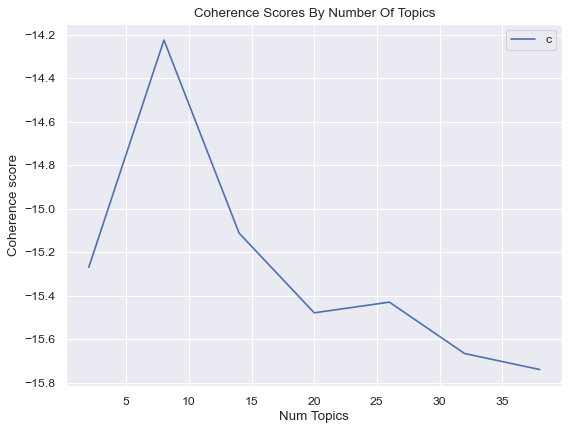

[-15.269844958850395, -14.225441823181098, -15.11294669041632, -15.47936919756468, -15.430244154267768, -15.666405483619663, -15.740023229633891]


In [120]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word , corpus=corpus, texts=dfLDA['tokens'].to_list(), start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence Scores By Number Of Topics')
plt.savefig('CoherenceScores.png')
plt.show()
print(coherence_values)

In [121]:
# data = pd.DataFrame({"Num Topics": x, "Coherence score": coherence_values})
# sns.lineplot(data=data, x='Num Topics', y='Coherence score', markers=True)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [122]:
coherence_values

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[-15.269844958850395,
 -14.225441823181098,
 -15.11294669041632,
 -15.47936919756468,
 -15.430244154267768,
 -15.666405483619663,
 -15.740023229633891]

# Time Series Analysis

In [123]:
dfTimeSeries = dfLDA.sort_values(by='PostDate', ascending=True).copy()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [124]:
dfTimeSeries[['PostDate', 'User DisplayName', 'compound']]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,PostDate,User DisplayName,compound
0,2019-10-10 05:58:05.730,ChinusGomes,0.0387
1,2019-10-10 12:44:35.957,AnikB,0.7044
2,2019-10-10 14:56:52.947,Alecia,0.9359
1085,2019-10-10 15:41:06.877,Christine T.,0.7905
3,2019-10-10 20:56:53.483,pnightingale,0.9359
...,...,...,...
1017,2021-06-04 05:25:16.927,wassimmeziou,0.5647
1018,2021-06-04 10:11:48.013,waqas_akram,0.5775
1019,2021-06-04 19:14:13.090,Kyle Klinger,-0.5780
1020,2021-06-08 04:53:56.600,Lukhog,0.9182


In [125]:
pd.options.display.max_rows = 100
dfTimeSeries[['User DisplayName']].value_counts().sort_values(ascending=False)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



User DisplayName
Christine T.        40
John Mitchell       37
pnightingale        22
Girts Mazais        21
ChrisCC             20
                    ..
Vania Cardoso        1
liasgm               1
VanishaImex          1
Vince27              1
Maurice              1
Length: 405, dtype: int64

In [162]:
dfUserSentimentOverTime = dfTimeSeries[['PostDate', 'User DisplayName', 'compound']].copy()
dfUserSentimentOverTime.groupby("User DisplayName").filter(lambda x: len(x) > 15)

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,PostDate,User DisplayName,compound
1085,2019-10-10 15:41:06.877,Christine T.,0.7905
3,2019-10-10 20:56:53.483,pnightingale,0.9359
4,2019-10-11 13:10:28.983,ChrisCC,0.5980
9,2019-10-14 08:33:18.010,ChrisCC,0.2023
13,2019-10-17 09:14:34.753,Denise Hartman,0.5719
...,...,...,...
1001,2021-05-25 23:21:55.333,pnightingale,0.9359
1004,2021-05-28 11:21:25.033,Christine T.,0.5958
1005,2021-05-28 13:33:13.153,Christine T.,0.7052
1009,2021-06-02 12:18:46.267,Christine T.,0.6883


In [307]:
MinimumPostCount = 15
fig = px.line(dfUserSentimentOverTime.groupby("User DisplayName").filter(lambda x: len(x) > MinimumPostCount), 
              x='PostDate',  
              y='compound', 
              title='<b>Time Series Sentiment - Minimum Post Count By User: {}<b>'.format(MinimumPostCount), 
              color='User DisplayName',
             line_shape='spline')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ]) 
    )    
)

fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)', 
'paper_bgcolor': 'rgb(250,250,250)',
})



fig.write_html('UserSentimentOverTimeWithSlider.html')
fig.show()

## November seems interesting as a dip in sentiment score for some users, let's chart that

In [164]:
dfNov = dfUserSentimentOverTime.groupby("User DisplayName").filter(lambda x: len(x) > MinimumPostCount)
dfNov_SomeUsers = dfNov[(dfNov['User DisplayName'].str.contains('ChrisCC')) | 
      (dfNov['User DisplayName'].str.contains('Denise Hartman')) |
      (dfNov['User DisplayName'].str.contains('pnightingale')) | 
      (dfNov['User DisplayName'].str.contains('John Mitchell'))]
# dfNov_SomeUsers


MinimumPostCount = 15
fig = px.line(dfNov_SomeUsers, 
              x='PostDate',  
              y='compound', 
              title='Specific Users', 
              color='User DisplayName', 
             line_shape='spline')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ]) 
    )    
)

fig.update_traces(mode='lines')


fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)', 
    'paper_bgcolor': 'rgba(0,0,0,0)'
})

fig.write_html('NovUserSentimentOverTimeWithSlider.html')
fig.show()

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [194]:
dfUserSentimentOverTime_May = dfUserSentimentOverTime.copy()
# dfUserSentimentOverTime_May.set_index('PostDate', inplace=True)
dfUserSentimentOverTime_May = dfUserSentimentOverTime_May[(dfUserSentimentOverTime_May.PostDate.dt.year == 2020) & (dfUserSentimentOverTime_May.PostDate.dt.month > 9) & (dfUserSentimentOverTime_May.PostDate.dt.month < 12)]
dfUserSentimentOverTime_May

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,PostDate,User DisplayName,compound
613,2020-10-01 04:05:51.267,Ciro M.,0.4199
614,2020-10-01 15:18:19.523,Matt K,0.0958
615,2020-10-02 09:26:32.680,Diego B. Vogel,0.0387
616,2020-10-04 06:57:42.663,Monther,0.2458
617,2020-10-05 01:11:31.057,UsmanKhan,-0.4098
...,...,...,...
724,2020-11-25 13:13:05.463,StevieR,-0.7996
725,2020-11-25 14:28:28.507,Mike.F,0.9348
726,2020-11-25 15:43:04.867,Jimmy Thomas,0.9427
727,2020-11-26 11:43:14.277,Mfalco,-0.7381


## Highlighted sections

In [308]:
dfNov = dfUserSentimentOverTime.groupby("User DisplayName").filter(lambda x: len(x) > MinimumPostCount)
dfNov_SomeUsers = dfNov[(dfNov['User DisplayName'].str.contains('ChrisCC')) | 
      (dfNov['User DisplayName'].str.contains('Denise Hartman')) |
      (dfNov['User DisplayName'].str.contains('pnightingale')) | 
      (dfNov['User DisplayName'].str.contains('John Mitchell'))]
# dfNov_SomeUsers


MinimumPostCount = 15
fig = px.line(dfNov_SomeUsers, 
              x='PostDate',  
              y='compound', 
              title='<b>Anomaly #2: November, Specific Users - Set {B}</b>', 
              color='User DisplayName', 
             line_shape='spline')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ]) 
    )    
)

fig.update_traces(mode='lines')

fig.add_vrect(
    x0="2020-10-01", x1="2021-01-31",
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0,
),



fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)', 
    'paper_bgcolor': 'rgb(250,250,250)',
})

fig.write_html('NovUserSentimentOverTimeWithSlider.html')
fig.show()

In [305]:
dfMay = dfUserSentimentOverTime.groupby("User DisplayName").filter(lambda x: len(x) > MinimumPostCount)
dfMay_SomeUsers = dfMay[(dfMay['User DisplayName'].str.contains('Christine T.')) | 
      (dfMay['User DisplayName'].str.contains('Denise Hartman')) |
      (dfMay['User DisplayName'].str.contains('Girts Mazais')) | 
      (dfMay['User DisplayName'].str.contains('John Mitchell')) |
      (dfMay['User DisplayName'].str.contains('Greytrix'))]

dfMay_SomeUsers


MinimumPostCount = 15
fig = px.line(dfMay_SomeUsers, 
              x='PostDate',  
              y='compound', 
              title='<b>Anomaly #1: May, Specific Users - Set {A}</b>', 
              color='User DisplayName', 
              line_shape='spline')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ]) 
    )    
)

fig.update_traces(mode='lines')

fig.add_vrect(
    x0="2020-04-01", x1="2020-07-01",
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0,
),



fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)', 
    'paper_bgcolor': 'rgb(240,240,240)',
})

fig.write_html('MayUserSentimentOverTimeWithSlider.html')
fig.show()

In [131]:
dfNov_SomeUsers

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,PostDate,User DisplayName,compound
3,2019-10-10 20:56:53.483,pnightingale,0.9359
4,2019-10-11 13:10:28.983,ChrisCC,0.5980
9,2019-10-14 08:33:18.010,ChrisCC,0.2023
13,2019-10-17 09:14:34.753,Denise Hartman,0.5719
30,2019-10-24 16:34:04.713,pnightingale,0.9359
35,2019-10-29 16:46:32.203,ChrisCC,0.6597
48,2019-11-08 20:33:59.890,pnightingale,0.9359
71,2019-11-19 11:00:35.740,ChrisCC,0.4404
76,2019-11-21 00:07:58.053,pnightingale,0.9199
78,2019-11-21 14:08:12.470,ChrisCC,0.5859


In [132]:
dfLDA[['User DisplayName', 'PostDate','Forum_Post_Raw']]

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,User DisplayName,PostDate,Forum_Post_Raw
0,ChinusGomes,2019-10-10 05:58:05.730,Company upgraded to windows 10. Used to run an...
1,AnikB,2019-10-10 12:44:35.957,Hello!\n\nI see that Sage V11 patch 14 was com...
2,Alecia,2019-10-10 14:56:52.947,"To access this download, log into https://supp..."
3,pnightingale,2019-10-10 20:56:53.483,"To access this download, log into https://supp..."
4,ChrisCC,2019-10-11 13:10:28.983,I am trying to remove some of the columns on t...
...,...,...,...
1081,Afrosage,2020-04-29 11:08:12.530,\nThe above pic is carry forward selection ch...
1082,Nicolasson,2020-04-23 11:51:48.660,"Hello guys, \n\nI hope you are well. \n\nI mad..."
1083,Warren Guan,2020-04-23 19:33:37.777,It says all the lines are converted but it did...
1084,info@epochholland.nl,2020-01-20 07:01:58.370,


In [133]:
# Join the datasets for analysis
LowestSentiment = dfNov_SomeUsers.join(dfLDA[['User DisplayName', 'PostDate','Forum_Post_Raw']], lsuffix='_caller', rsuffix='_dfLDAr').sort_values(by='compound', ascending=True)


C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [134]:
LowestSentiment

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,PostDate_caller,User DisplayName_caller,compound,User DisplayName_dfLDAr,PostDate_dfLDAr,Forum_Post_Raw
670,2020-10-28 13:28:28.833,Denise Hartman,-0.9209,Denise Hartman,2020-10-28 13:28:28.833,We have a user in X3 V12 that is set up to cal...
428,2020-06-17 09:23:08.720,Denise Hartman,-0.8449,Denise Hartman,2020-06-17 09:23:08.720,Is anybody using the PAY object for a web serv...
370,2020-05-13 09:12:49.927,Denise Hartman,-0.7964,Denise Hartman,2020-05-13 09:12:49.927,I am trying to call an X3 SOAP web services fr...
656,2020-10-21 14:06:01.427,ChrisCC,-0.7817,ChrisCC,2020-10-21 14:06:01.427,"Hi, \nI am trying to do a misc issue by import..."
753,2020-12-21 08:30:12.503,Denise Hartman,-0.7184,Denise Hartman,2020-12-21 08:30:12.503,We have an integration with a 3rd party eComme...
235,2020-02-26 12:34:35.337,ChrisCC,-0.6597,ChrisCC,2020-02-26 12:34:35.337,I am getting the following error when i try to...
983,2021-05-14 08:27:02.380,Denise Hartman,-0.6310,Denise Hartman,2021-05-14 08:27:02.380,"I have seen this question come up before, but ..."
711,2020-11-19 16:56:39.440,John Mitchell,-0.6007,John Mitchell,2020-11-19 16:56:39.440,We're trying to get MRP to do WOS's in increme...
930,2021-04-09 14:10:26.533,Denise Hartman,-0.5950,Denise Hartman,2021-04-09 14:10:26.533,I and working on a web service to create produ...
92,2019-12-03 16:06:57.230,ChrisCC,-0.5719,ChrisCC,2019-12-03 16:06:57.230,A stock movement ran into an error and it made...


In [135]:
LowestSentiment.columns

C:\Users\BDelamater\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['PostDate_caller', 'User DisplayName_caller', 'compound',
       'User DisplayName_dfLDAr', 'PostDate_dfLDAr', 'Forum_Post_Raw'],
      dtype='object')

In [ ]:
def WriteForumTables(dataSets):
    for frame in dataSets:
        headerColor = 'grey'
        rowEvenColor = 'lightgrey'
        rowOddColor = 'white'
        print(type(frame))
#         fig = go.Figure(data=[go.Table(
#             columnwidth = [50,50,300],
#             header=dict(values=[x for x in features],
#                         fill_color='#39416C',                
#                         font=dict(color='white', size=12),
#                         align=['left', 'left', 'left']),
#             cells=dict(values=[frame.PostDate_caller, frame.DisplayName_caller, frame.Forum_Post_Raw],
#                     fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
#                     align=['left', 'left', 'left']))
#         ])
#         fig.update_layout(title=frame.name, width=1000, height=500)
#         fig.write_html(frame.name+".html")
#         fig.show()

        
        
features = ['PostDate_caller','DisplayName_caller','Forum_Post_Raw']
LowestSentiment.name = "Neutral"
 
WriteForumTables(LowestSentiment)
